In [1]:
#pip install scikit-learn
import pandas as pd
import numpy as np

# https://scikit-learn.org/stable/
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
import numpy as np


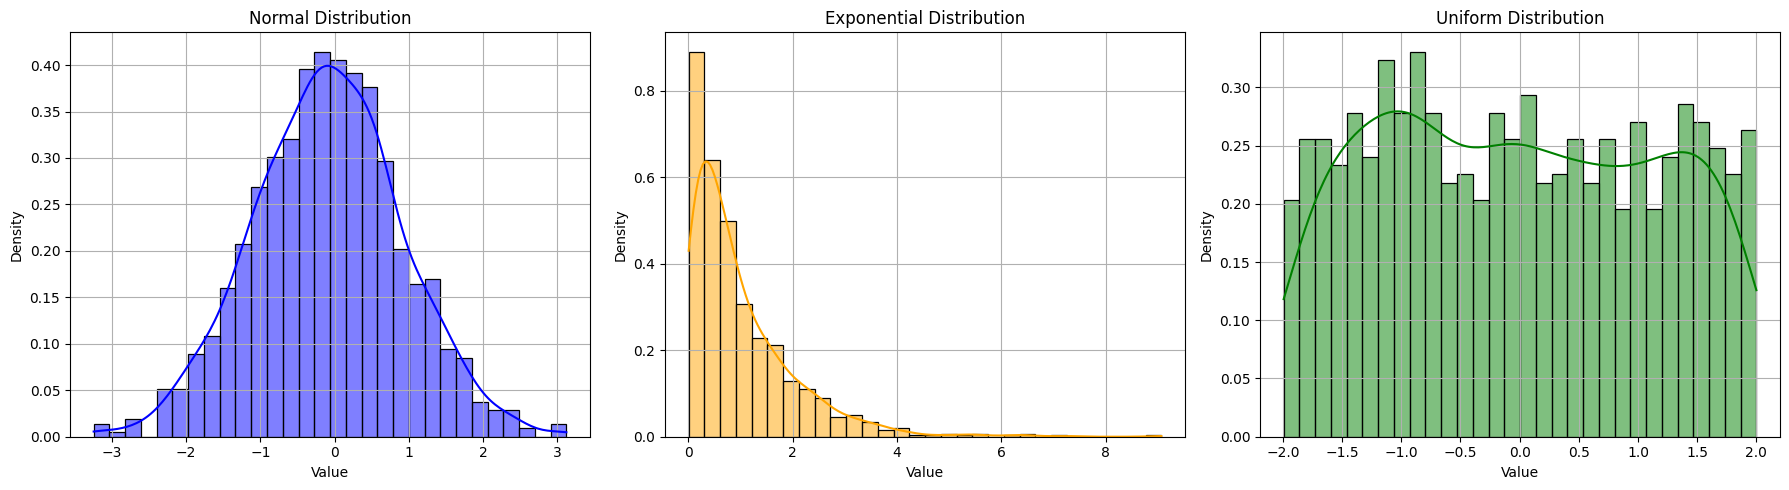

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Teaching Example: Random Sampling
# -------------------------------

# 1. Normal Distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)
# loc = Mean =0, scale is standard deviation


# 2. Exponential Distribution
exponential_data = np.random.exponential(scale=1, size=1000)
#Parameters of an Exponential Distribution: 1- Rate parameter (λ, lambda), Scale parameter (β)
#This is the mean (average) waiting time between events. invesr of lambda


# 3. Uniform Distribution
uniform_data = np.random.uniform(low=-2, high=2, size=1000)
# low=-2 The minimum value (start of the interval).No number smaller than -2 will be generated.
# high=2 The maximum value (end of the interval).

# -------------------------------
# Plotting the distributions separately
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # plt.subplots(1, 3, ...) Creates a figure (fig) and an array 
# of subplots (axes). 1, 3 means → 1 row, 3 columns → 3 plots side by side.

# Normal distribution
sns.histplot(normal_data, bins=30, kde=True, color='blue', stat="density", ax=axes[0])
axes[0].set_title("Normal Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Exponential distribution
sns.histplot(exponential_data, bins=30, kde=True, color='orange', stat="density", ax=axes[1])
axes[1].set_title("Exponential Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Uniform distribution
sns.histplot(uniform_data, bins=30, kde=True, color='green', stat="density", ax=axes[2])
axes[2].set_title("Uniform Distribution")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")
axes[2].grid(True)

plt.tight_layout() #It’s a Matplotlib function that automatically adjusts 
# the spacing between subplots so that labels, titles, and axes don’t overlap.
plt.show()


In [3]:
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
}

In [4]:
data

{'Name': ['Alice', 'Bob', 'Charlie'],
 'Age': [25, 30, 35],
 'City': ['New York', 'Los Angeles', 'Chicago']}

In [5]:
import pandas as pd
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [6]:
# Number of rows
n = 1000
np.random.seed(42)

# Features
data = {
    "SoilFertility": np.random.uniform(1, 10, n),
    "Rainfall": np.random.uniform(200, 1200, n),
    "AvgTemp": np.random.uniform(10, 35, n),
    "SoilMoisture": np.random.uniform(5, 40, n),
    "FertilizerUse": np.random.uniform(0, 300, n),
    "PestPressure": np.random.uniform(0, 10, n),
    "Latitude": np.random.uniform(-10, 50, n),
    "Longitude": np.random.uniform(-80, 120, n),
}
#Latitude measures how far north or south you are from the Equator.
# Positive latitude → North of the Equator. Negative latitude → South of the Equator.

# Target with weaker relationships + higher noise
data["CropYield"] = (
    0.2 * data["SoilFertility"]
    + 0.005 * data["Rainfall"]
    - 0.02 * data["PestPressure"]
    + 0.01 * data["FertilizerUse"]
    + np.random.normal(0, 3.0, n)   # big noise added
)

# Create DataFrame
df_crop = pd.DataFrame(data)
df_crop.head()

,SoilFertility,Rainfall,AvgTemp,SoilMoisture,FertilizerUse,PestPressure,Latitude,Longitude,CropYield
0,4.370861,385.132929,16.542642,28.544605,171.598763,3.936355,28.895417,-72.240109,7.313546
1,9.556429,741.900947,16.174470,32.883849,241.629699,4.734357,0.343182,-42.645494,11.325459
2,7.587945,1072.945836,32.656365,13.766376,228.048279,8.545474,42.343674,86.249161,3.149864
3,6.387926,932.224886,16.238655,26.870593,46.169971,3.400044,26.786974,73.353671,9.267782
4,2.404168,1006.561148,16.798743,25.011109,44.774841,8.696497,-0.567767,-9.871462,3.355872



Train and Test Split

In the cell below, we will split our data into training samples and test samples.
It's an important step, when we reserve some of the data for model evaluation purposes. It will help us determine if the model actually learned the data or memorised it.
And the idea is, once the model is done training on the train set, we must expose it to samples it has never seen before (test set) to determine how well it performs. That's why we usually reserve about a 1/5th of the data for testing, instead of using the entire data during training.


In [7]:
# Split features and target
X = df_crop.drop("CropYield", axis=1).values
y = df_crop["CropYield"].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)

print("number of train samples:", len(x_train))
print("number of test samples:", len(x_test))


number of train samples: 800
number of test samples: 200



Train Model on Data Subset

In the cell below, we will choose a machine learning algorithm and we will train it on the California Housing Data


In [8]:
from sklearn.linear_model import LinearRegression

# choose algorithm
model = LinearRegression()
# train model on the train set
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False



Evaluate Model on Data Subset

To understand how well-trained and intelligent our model is, we will need to test whether it learned or memorised the data (as mentioned above).

For this, we will make the model "guess" (or predict) the dollar value of samples it has never seen before (x_test).
Once we get a prediction from our model, we'll compare it to the actual dollar value (given by y_test), which will produce a model score.

In our example, we will use the R2 metric to obtain a score, and since it's the first time we are evaluating this model, this score will represent our Baseline.


In [9]:
# get the model to "guess" the dollar value of the houses in the test sample
y_pred = model.predict(x_test)
# compare what the model "guessed" with the actual value from y_test
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSD:", rmsd)

R2 Score: 0.32339847315884807
RMSD: 3.2388455238474565



Optimization

Once we have a baseline model and a baseline R2 score, our goal is to improve it further and further. For example: At the moment, our score is 0.60, which means that our model "understands" 60% of why the house prices go up and down. The other 40% is a mystery! Our objective in Machine Learning is to minimise the mystery as much as possible!

There are several techniques with which we can optimize this score, and you can find a few of them below.
Optimize Features

The first optimization technique expands the number of features (or columns) and automatically generates more data for our model to rely on.
We will introduce Polynomial Features to our workflow, expanding our 8 existing features to 45 of them.

So in addition to the 8 features we currently have, we will add their squares (for example: 7 rooms and 49 rooms^2), and we will also multiply each column by another (for example: built year * number of occupants), resulting in 36 extra features!
Make sure to expand both the test data and the train data, as their number of columns must always match!


In [10]:
# Linear ----> 1 independant variable
# multiple Reg ----> x has power 1 but we have multiple x
# Polynomial ---> multple x with different powers

#Example: If your original features are 
# x1,x2 ---> polynomial Features can generate:

# x1,x2,x1 power 2,x1x2,x2 power 2  ---> degree=2 → includes powers up to 2 and their interaction

In [11]:
from sklearn.preprocessing import PolynomialFeatures

print("old numebr of features:", len(x_train[0]))

poly = PolynomialFeatures() # Defaylt is 2, if we type 3 then it generates power 3
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

print("new numebr of features:", len(x_train[0]))

old numebr of features: 8
new numebr of features: 45


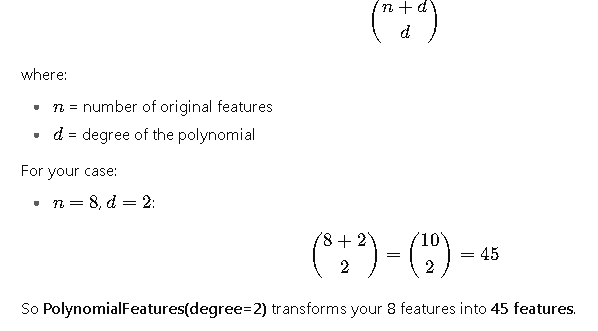


Optimize Algorithms

How do we know that LinearRegression is the best algorithm for our type of data?
The answer is: WE DON'T!
Which means that we need to try several algorithms to determine that, in our case: LinearRegression, GradientBoostingRegresso, RandomForestRegressor.
Once we compair the R2 score for each model, we will know which algorithm works best!


In [12]:
from sklearn.ensemble import (
    GradientBoostingRegressor, 
    RandomForestRegressor
)

# initialize models
LR = LinearRegression()
GBR = GradientBoostingRegressor()
RFR = RandomForestRegressor()

# iterate over models, training and evaluating each
for model in [LR, GBR, RFR]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
    print("MODEL:", model)
    print("R2 SCORE:", r2)
    print("RMSD:", rmsd)
    print("-------------")


#rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
#print("RMSD:", rmsd)

MODEL: LinearRegression()
R2 SCORE: 0.32163976748079126
RMSD: 3.2430521942734263
-------------
MODEL: GradientBoostingRegressor()
R2 SCORE: 0.26702723407803575
RMSD: 3.3710691979981844
-------------
MODEL: RandomForestRegressor()
R2 SCORE: 0.30177140038233874
RMSD: 3.2902020224623265
-------------




We notice that the RandomForestRegressor and the GradientBoostingRegressor perform better than the baseline by more than 19 points!
Which means that they are a better fit than LinearRegression, and we should use one of them instead.
There's just one problem with these new algorithms - they take a relatively long time to process and they are very heavy on our computer. We will solve it in the cell below.
Optimize Algorithm Speed

If we'd like to optimize the algorithm speed, rather than the R2 score, we can do the following:

    RandomForestRegressor: add n_jobs=-1 argument to use the maximum available number of CPU cores for processing
    GradientBoostingRegressor: use optimized and more efficient version of this algorithm, HistGradientBoostingRegressor

Let's apply these in the cell below:


In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor

# initialize speed optimized models
GBR = HistGradientBoostingRegressor()  # a better algorithm for XGboost
RFR = RandomForestRegressor(
    n_jobs=-1    # tell our CPU use all yoru corse 
    #(the individual processing units inside your computer’s processor, modern cpu =4, 8, 12).i5=4
)

# iterate over models, training and evaluating each
for model in [GBR, RFR]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
    print("MODEL:", model)
    print("R2 SCORE:", r2)
    print("RMSD:", rmsd)
    print("-------------")

MODEL: HistGradientBoostingRegressor()
R2 SCORE: 0.22538981129899882
RMSD: 3.465495591496068
-------------
MODEL: RandomForestRegressor(n_jobs=-1)
R2 SCORE: 0.2568767913965502
RMSD: 3.3943307668881193
-------------




We see that now, our optimized GradientBoostingRegressor model, produces a better R2 score than before!

With HistGradientBoostingRegressor, we are now 4 points above the GradientBoostingRegressorscore from the previous cell, and 24 points above the baseline! So let's choose this as our best-performing model and let's use it in the rest of this notebook.
Optimize Hyperparameters

The last optimization technique we will see in this notebook, is optimization of hyperparameters for the best-performing model.
We can try different combinations of model parameter values to improve our score further and further, such as: max_iter, learning_rate, max_depth, etc.

In the cell below, we will find which number of trees works best for the HistGradientBoostingRegressor, optimizing a parameter named n_features


In [14]:
for i in [100, 200, 300]: # same model multipel runs with more trees
    model = HistGradientBoostingRegressor(
        max_iter = i
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
    print("NUMBER OF TREES:", i)
    print("R2 SCORE:", r2)
    print("RMSD:", rmsd)
    print("-------------")

NUMBER OF TREES: 100
R2 SCORE: 0.22538981129899882
RMSD: 3.465495591496068
-------------
NUMBER OF TREES: 200
R2 SCORE: 0.20844260638028256
RMSD: 3.503200168475872
-------------
NUMBER OF TREES: 300
R2 SCORE: 0.20421211966299946
RMSD: 3.512549138560134
-------------


We see that the best R2 score is given by max_iter=400, but that's not all! We can optimize more than one hyperparameter, so let's also introduce learning_rate into the miz with a nested for loop:

In [15]:
for j in [0.1, 0.05, 0.001]:  # Another parameters as learnign rate (hyperparameters tuning)
    for i in [200, 300, 400]:
        model = HistGradientBoostingRegressor(
            max_iter = i,
            learning_rate = j
        )
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
        print("NUMBER OF TREES:", i)
        print("R2 SCORE:", r2)
        print("RMSD:", rmsd)
        print("-------------")

NUMBER OF TREES: 200
R2 SCORE: 0.20844260638028256
RMSD: 3.503200168475872
-------------
NUMBER OF TREES: 300
R2 SCORE: 0.20421211966299946
RMSD: 3.512549138560134
-------------
NUMBER OF TREES: 400
R2 SCORE: 0.2022639246919543
RMSD: 3.5168461048942588
-------------
NUMBER OF TREES: 200
R2 SCORE: 0.24009897638366973
RMSD: 3.4324345350025474
-------------
NUMBER OF TREES: 300
R2 SCORE: 0.2290144514477267
RMSD: 3.457378022476606
-------------
NUMBER OF TREES: 400
R2 SCORE: 0.22073648852708128
RMSD: 3.4758891569876154
-------------
NUMBER OF TREES: 200
R2 SCORE: 0.08358964534551816
RMSD: 3.7693697593950874
-------------
NUMBER OF TREES: 300
R2 SCORE: 0.12013396972161605
RMSD: 3.6934482943569416
-------------
NUMBER OF TREES: 400
R2 SCORE: 0.14980502920712901
RMSD: 3.6306385442310867
-------------




We see that the best R2 score is 0.846 given by:

    max_iter=400
    learning_rate=0.05

So we should set it as our new best-performing model.

Please note, we've experimented only with 2 hyperparameters in this workflow, but in reality - you should experiment with as many hyperparameters combinations as possible!
Model Saving

Great! So we found our best performing model, which is almost 25 points better than the baseline! Next, we will need to save this model to our system, so we never have to train it again.

For this we will use a library named joblib:


In [16]:
# Save it with no more training
import joblib

model = HistGradientBoostingRegressor(
    max_iter=400, # best max iter
    learning_rate=0.05 # best learning rate
)
model.fit(x_train, y_train)

# save model
joblib.dump(model, "my_model.joblib") #model input & name of model to save

['my_model.joblib']

In [17]:
local_model = joblib.load('my_model.joblib')

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 SCORE:", r2)
print("RMSD:", rmsd)


R2 SCORE: 0.22073648852708128
RMSD: 3.4758891569876154
